# Questions

Q1. Can a house price be predicted for a home in a particular zip code with particular features?

Q2. Does density, as defined by the ratio of sqft living to sqft lot, affect house price?

Q3. Which features affect home price?

*inputs  are zip code, income, features etc.
   *use input method
   *assign mean for other inputs
   *make price prediction formula
   *output is price, affordability range, and show 5 comparable houses.

# EDA

In [2]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.yr_renovated.max()

2015.0

In [4]:
df.yr_renovated.min()

0.0

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.waterfront.value_counts()
#1.0 is waterfront

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
# this means has been viewed, not relevant to affordability.
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df_select = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',]]
df_select

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca95591d90>,
      dtype=object)

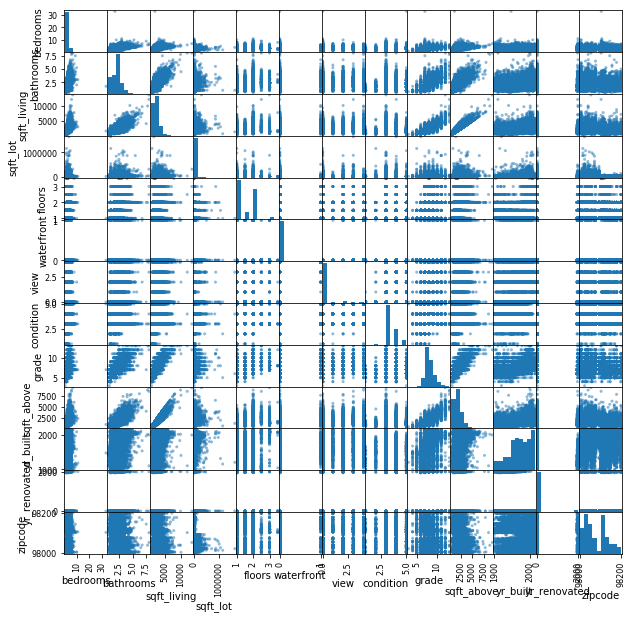

In [58]:
pd.plotting.scatter_matrix(df_select, figsize=(10,10))

df_cont = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built',]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcad68b7e10>,
      dtype=object)

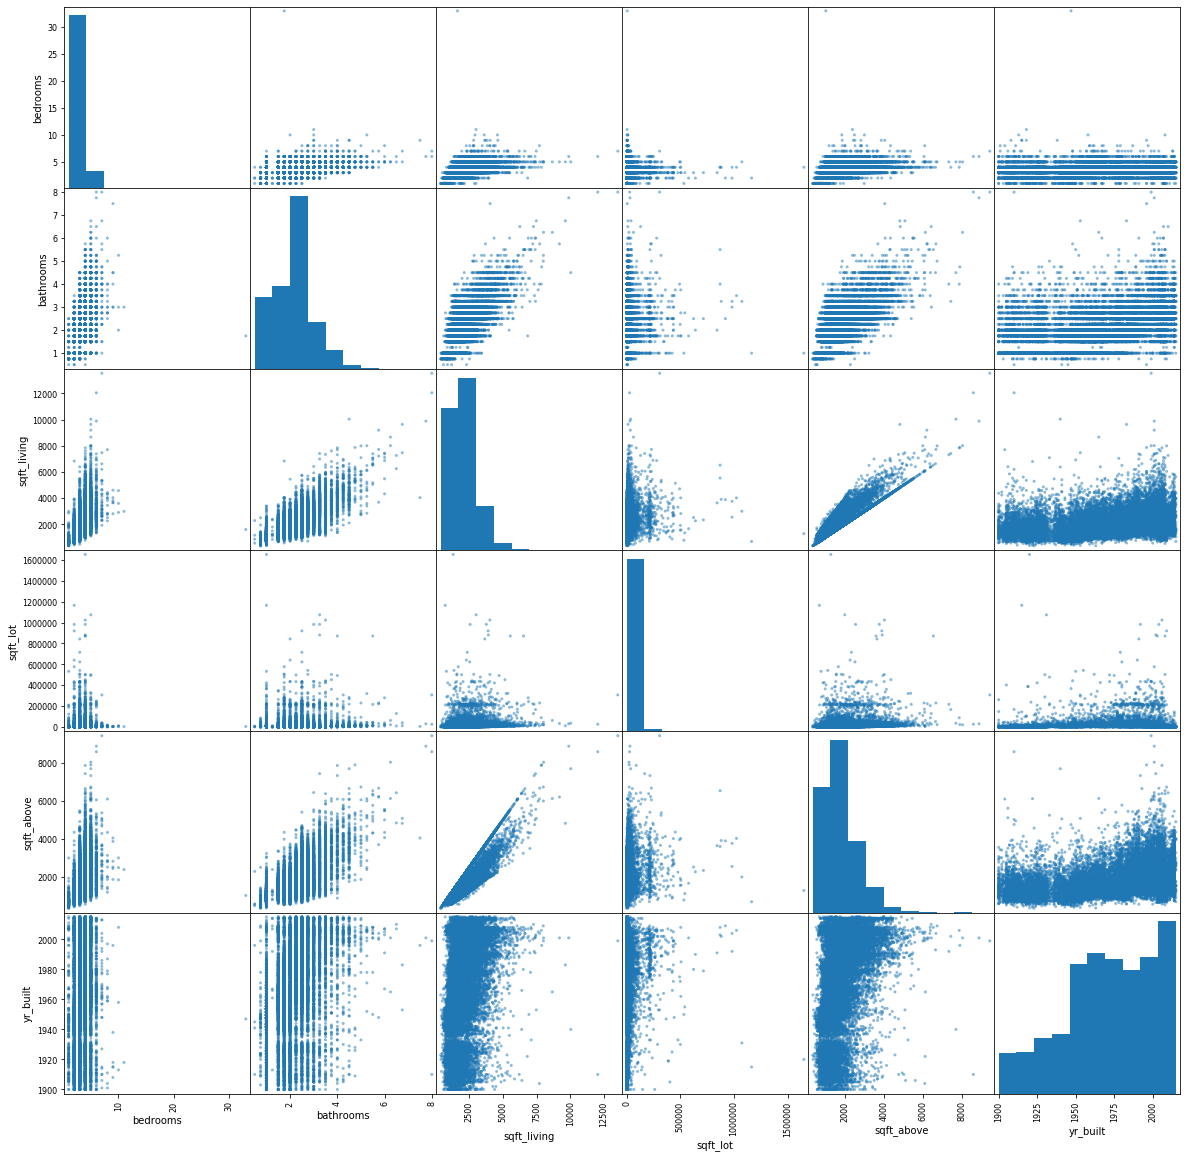

In [57]:
pd.plotting.scatter_matrix(df_cont, figsize=(20,20))

## Determine Colinearity

Text(0.5, 1.0, 'Graphical Colinearity Test')

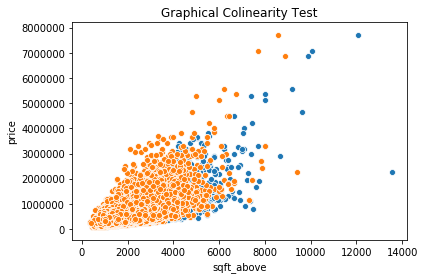

In [69]:
import seaborn as sns
sns.scatterplot(x=df['sqft_living'], y=df['price'], legend='full').set_title('Living Space Per Sales Price')

import seaborn as sns
sns.scatterplot(x=df['sqft_above'], y=df['price']).set_title('Graphical Colinearity Test')

#df.plot.scatter(x='sqft_living', y='price')

Text(0.5, 1.0, 'Bathrooms Versus Price')

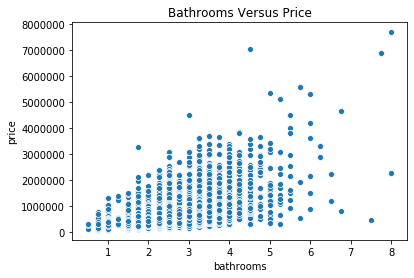

In [70]:
import seaborn as sns
sns.scatterplot(x=df['bathrooms'], y=df['price']).set_title('Bathrooms Versus Price')

Conclusion: sqft_above and sqft_living are colinear. Remove sqft_above.

In [53]:
#correlation matrix
df_cont.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.479386,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.686668,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.876448,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,0.184139,0.052946
sqft_above,0.479386,0.686668,0.876448,0.184139,1.000000,0.424037
yr_built,0.155670,0.507173,0.318152,0.052946,0.424037,1.000000


- correlations take a value between -1 and 1, -1 being a perfectly negative linear relationship, and +1 a perfectly positive linear relationship.

In [65]:
df_corr = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace=True)

df_corr.drop(columns=['level_1', 'level_0'], inplace=True)

df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr

,cc
pairs,
"(bedrooms, bedrooms)",1.000000
"(sqft_living, sqft_above)",0.876448
"(sqft_living, bathrooms)",0.755758
"(sqft_above, bathrooms)",0.686668
"(sqft_living, bedrooms)",0.578212
"(bedrooms, bathrooms)",0.514508
"(bathrooms, yr_built)",0.507173
"(bedrooms, sqft_above)",0.479386
"(sqft_above, yr_built)",0.424037


In [66]:
df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, bathrooms)",0.755758


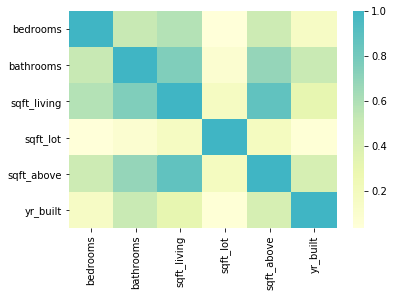

In [83]:
sns.heatmap(df_cont.corr(), center=1, cmap='YlGnBu');

The heatmap confirms that sqft_living, sqft_above, and bathrooms are correlated. 

## Normalize Data

### Log Transformation

In [19]:
df_cont.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1180,0.0,1955
1,3,2.25,2570,7242,2170,400.0,1951
2,2,1.00,770,10000,770,0.0,1933


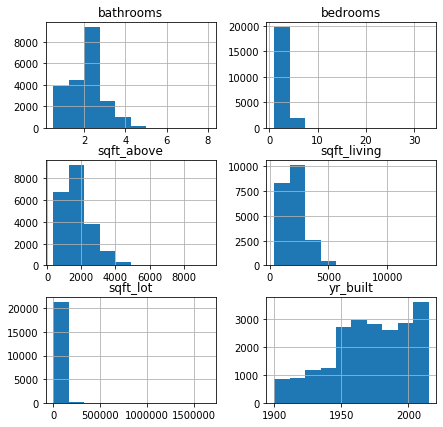

In [21]:
df_cont.hist(figsize = [7,7]);

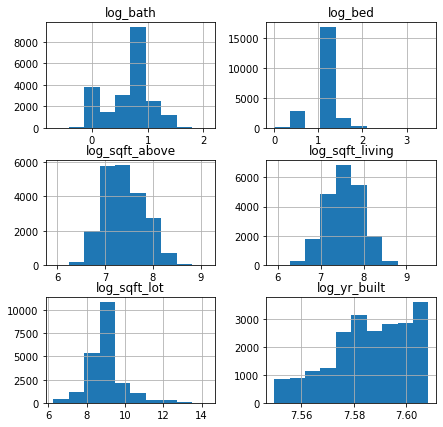

In [25]:
import numpy as np
df_cont_log = pd.DataFrame([])
df_cont_log['log_bath'] = np.log(df_cont['bathrooms'])
df_cont_log['log_bed'] = np.log(df_cont['bedrooms'])
df_cont_log['log_sqft_above'] = np.log(df_cont['sqft_above'])
df_cont_log['log_sqft_living'] = np.log(df_cont['sqft_living'])
df_cont_log['log_sqft_lot'] = np.log(df_cont['sqft_lot'])
df_cont_log['log_yr_built'] = np.log(df_cont['yr_built'])
df_cont_log.hist(figsize = [7,7]);

### Min-Max Scaling, Standardization & Mean Normalization

In [29]:
# assigning a variable to the log transformation of each element

logbath = df_cont_log['log_bath']
logbed = df_cont_log['log_bed'] 
logsf = df_cont_log['log_sqft_above']
logsfliv = df_cont_log['log_sqft_living']
logsflot = df_cont_log['log_sqft_lot']

#scaled_bath = (logbath - min(logbath)) / (max(logbath) - min(logbath))
#scaled_logbed = (logbed - min(logbed)) / (max(logbed) - min(logbed))

In [37]:
#creating functions for the transformations

def min_max_scaling(element):
    """Transforms an element to bring all values between 0 and 1."""
    scaled_element = (element - min(element)) / (max(element) - min(element))
    
def standardization(element, sigma):
    """Changes the mean and standard error"""
    std_element = (element - np.mean(element)) / sigma
    
def mean_normalization(element):
    norm_element = (element - np.mean(element)) / (max(element)- min(element))

In [33]:
variables = [logbath, logbed, logsf, logsfliv, logsflot]
for i in variables:
    print(min_max_scaling(i))

None
None
None
None
None


In [38]:
df_scaled = pd.DataFrame([])

df_scaled['scaled_bath'] = min_max_scaling(logbath)
df_scaled['scaled_bed'] = min_max_scaling(logbed)
df_scaled['scaled_sf'] = min_max_scaling(logsf)
df_scaled['scaled_sfliv'] = min_max_scaling(logsfliv)
df_scaled['scaled_sflot'] = min_max_scaling(logsflot)

df_scaled.head(3)

,scaled_bath,scaled_bed,scaled_sf,scaled_sfliv,scaled_sflot


## Create Model

## Project Requirements

- Business Understanding
   - Have you clearly defined your goal for your analysis?
     
   *inputs  are zip code, income, features etc.
   *use input method
   *assign mean for other inputs
   *make price prediction formula
   *output is price, affordability range, and show 5 comparable houses.

   - Have your thought about who your audience is and how they would use this information?
        People who are looking to buy a house.
   
   - How does this help the goals of the business/organization?
        This would give them insight to inform their policy and tax decisions as well as to create programs to help people afford homes. 

- Data Understanding
   - What data are you using?
        Using King County House Dataset provided as well as an equation for housing affordability from an industry standard.
   
   - How does your data help you answer the business question?
        Q1 which 3 features make more affordable homes
        * how do we determine top 3?
   
   - How many observations does your dataset contain?
        21597
        
   - What is the distribution of your data?
        not normal, so we will normalize.
        
   - What data types do you have?   
        int, float, year 

- Data Preparation

   - Have you looked/dealt with missing values?
        waterfront, view, year renovated.
        
   - Have you done any data-type conversion?
        not yet
        sqft_basement came in as an object, convert to int.
        
      - ex: numerical data incorrectly ‘typed’ as strings.
        
        Columns on x-axis:
        'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', density(added)
      
          determine linearity after plotting scatter plots of these
          determine co-linearity and remove these.
        
    - Does your data contain any outliers or non-sensical values?
        yes there are outliers
        revisit looking at scatter plots.